<a href="https://colab.research.google.com/github/mohammadarif2003/Telco_Customer_Churn_mohammadarif2003/blob/main/Telco_Customer_Churn_by_Mohammad_Arif_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workflow :
1. Import Library
2. Import Dataset
3. Inspecting Data
4. Data Manipulation
4. Data Preprocessing
5. Exploratory Data Analysis (EDA)
6. Modeling and Evaluation

# 1. Import Library

In [1]:
pip install xgboost

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model building and evaluation
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Feature importance
from sklearn.inspection import permutation_importance

# XGBoost import
import xgboost as xgb

# Additional utility imports
import kagglehub
import shutil
import os

# 2. Import Dataset

In [3]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [4]:
source_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")

destination_folder = "dataset"
new_filename = "telco_customer_churn.csv"
destination_path = os.path.join(destination_folder, new_filename)

os.makedirs(destination_folder, exist_ok=True)
shutil.copy(source_path, destination_path)
print(f"File copied and renamed to: {destination_path}")

df = pd.read_csv(destination_path)
df.head()

File copied and renamed to: dataset/telco_customer_churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Inspecting Data

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


# 4. Data Manipulation

In [10]:
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [12]:
df.dropna(subset=['TotalCharges'], inplace=True)
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

# 5. Exploratory Data Analysis (EDA)

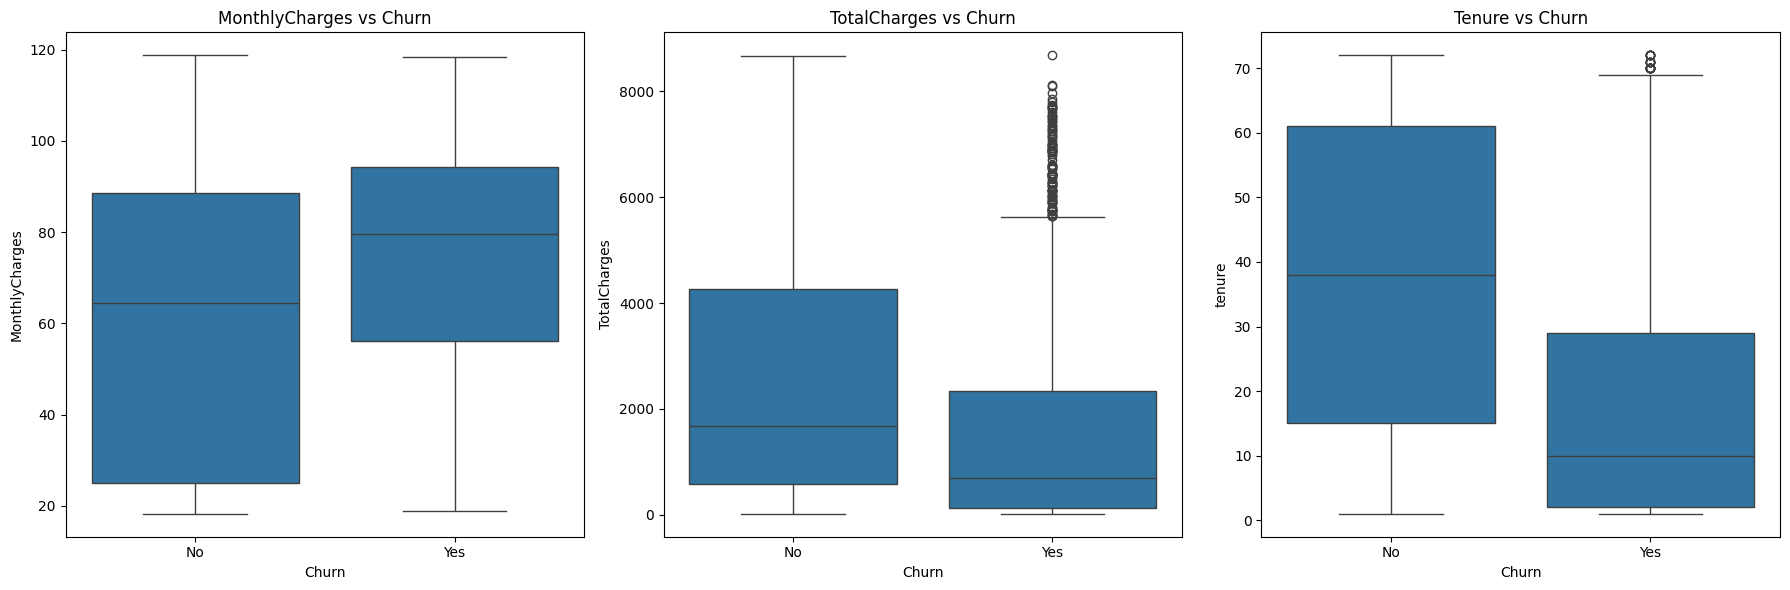

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')

plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('TotalCharges vs Churn')

plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')

plt.tight_layout()
plt.show()

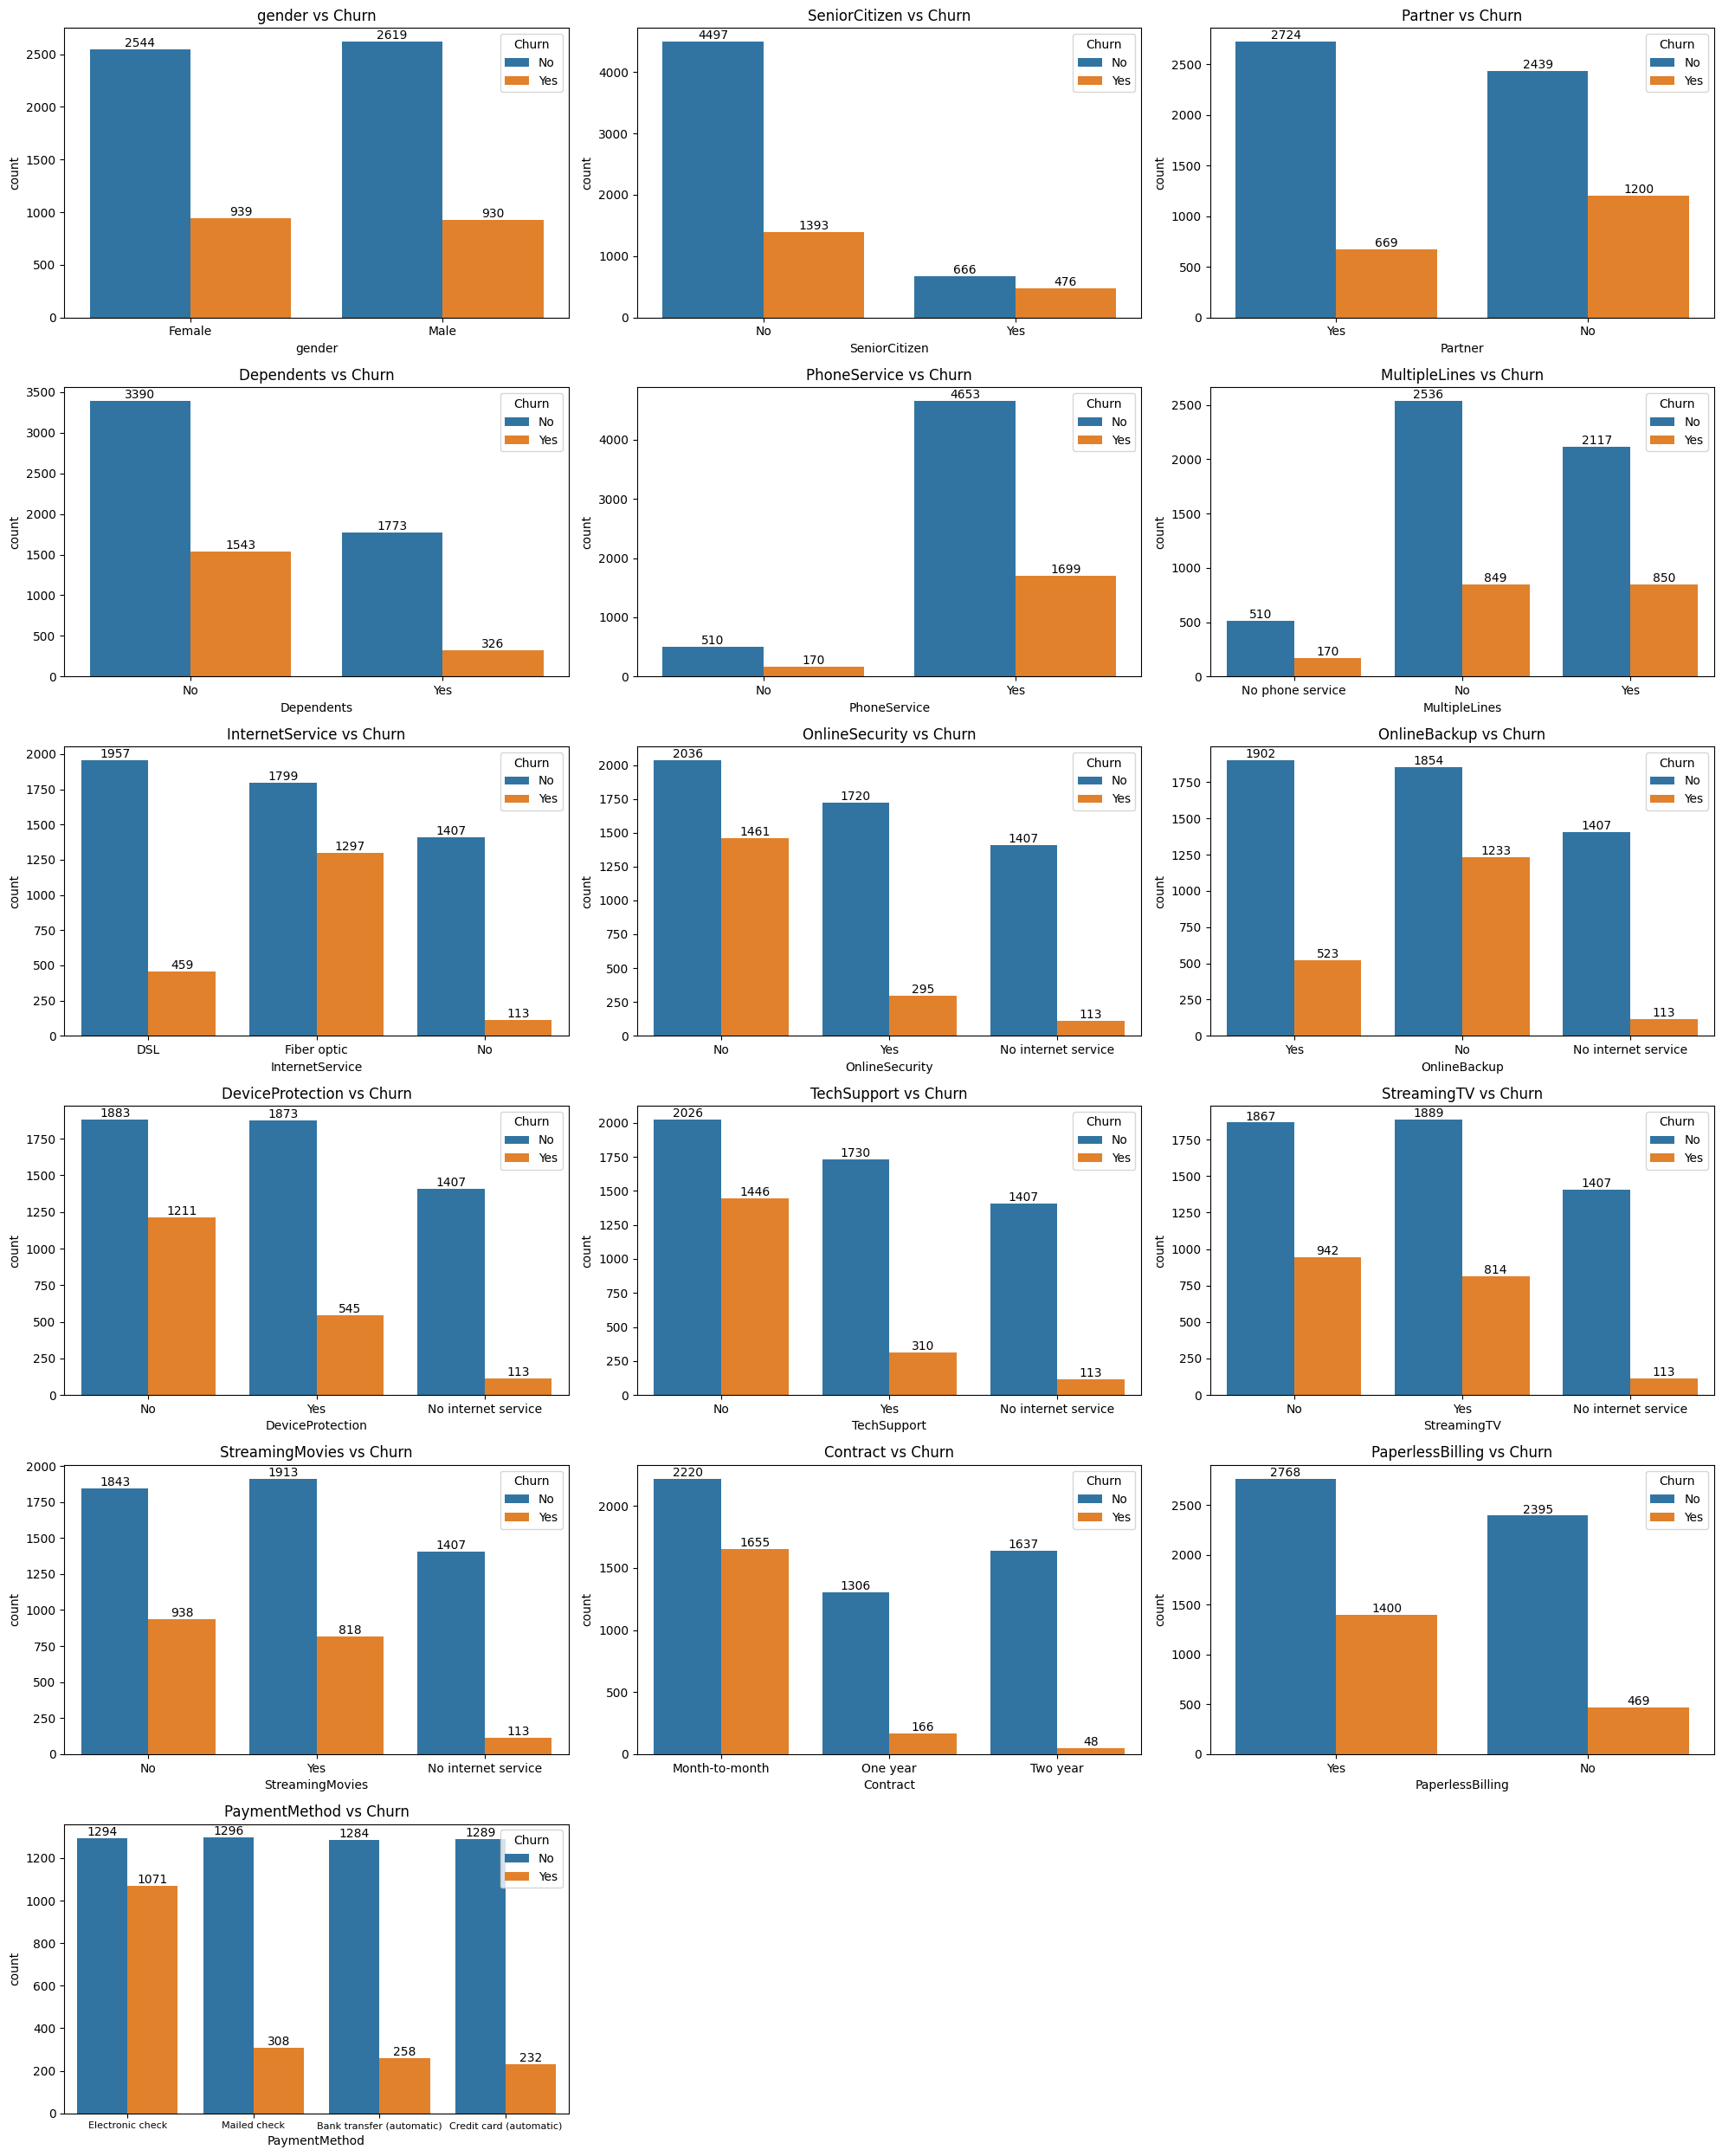

In [18]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    ax = sns.countplot(x=col, hue='Churn', data=df)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.title(f'{col} vs Churn', fontsize=12)

    if col == 'PaymentMethod':
        ax.tick_params(axis='x', labelsize=8)
plt.tight_layout()
plt.show()

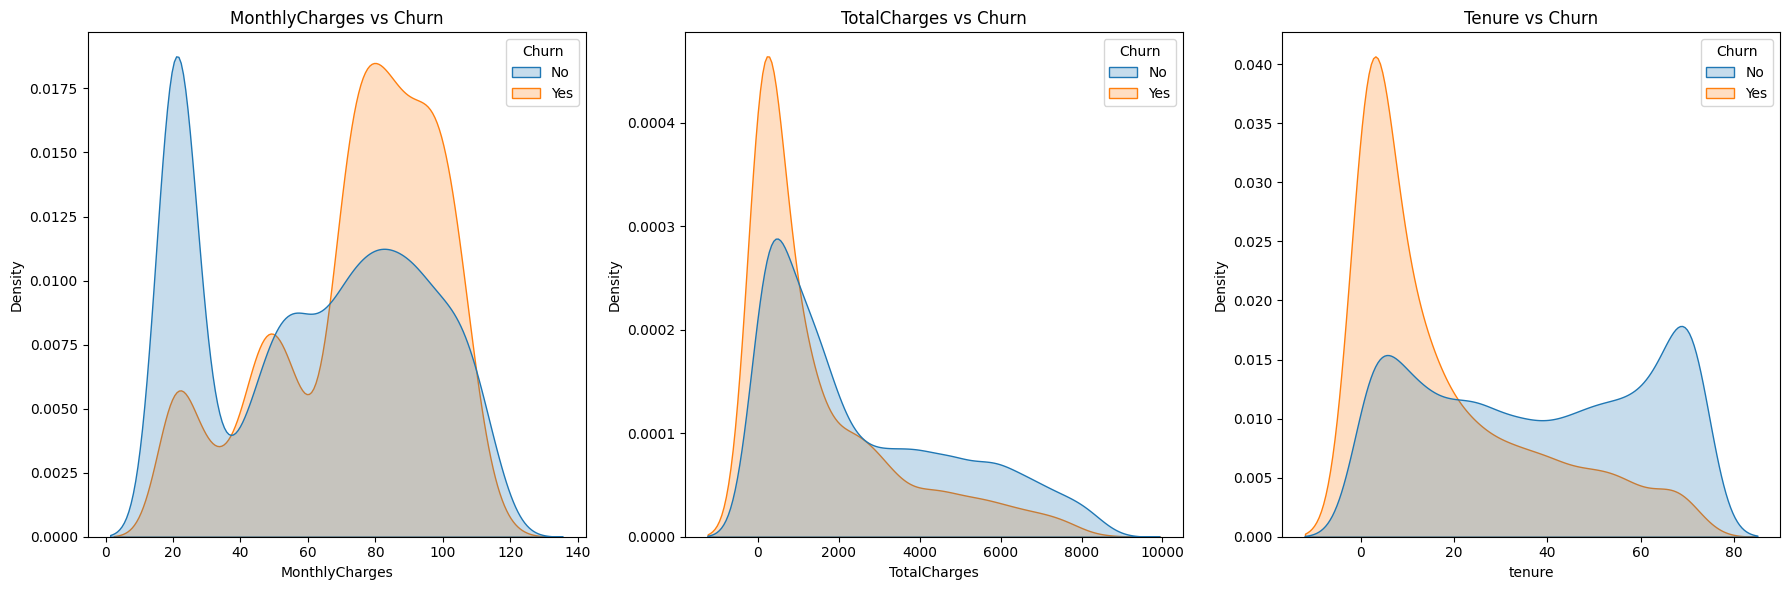

In [19]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False)
plt.title('MonthlyCharges vs Churn')

plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, common_norm=False)
plt.title('TotalCharges vs Churn')

plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False)
plt.title('Tenure vs Churn')

plt.tight_layout()
plt.show()

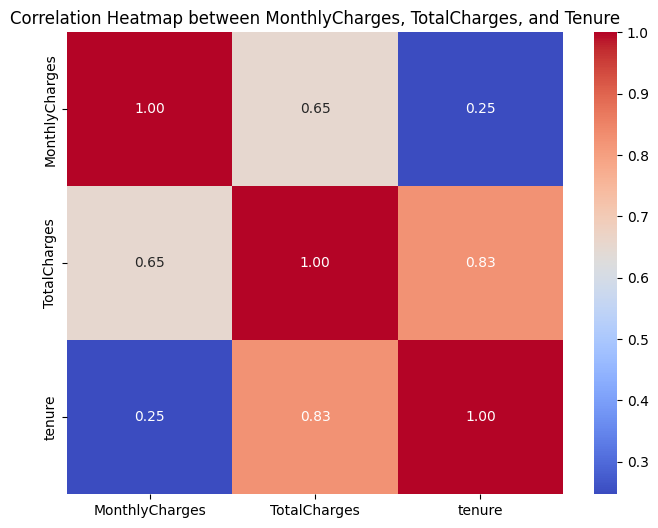

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['MonthlyCharges', 'TotalCharges', 'tenure']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between MonthlyCharges, TotalCharges, and Tenure')
plt.show()

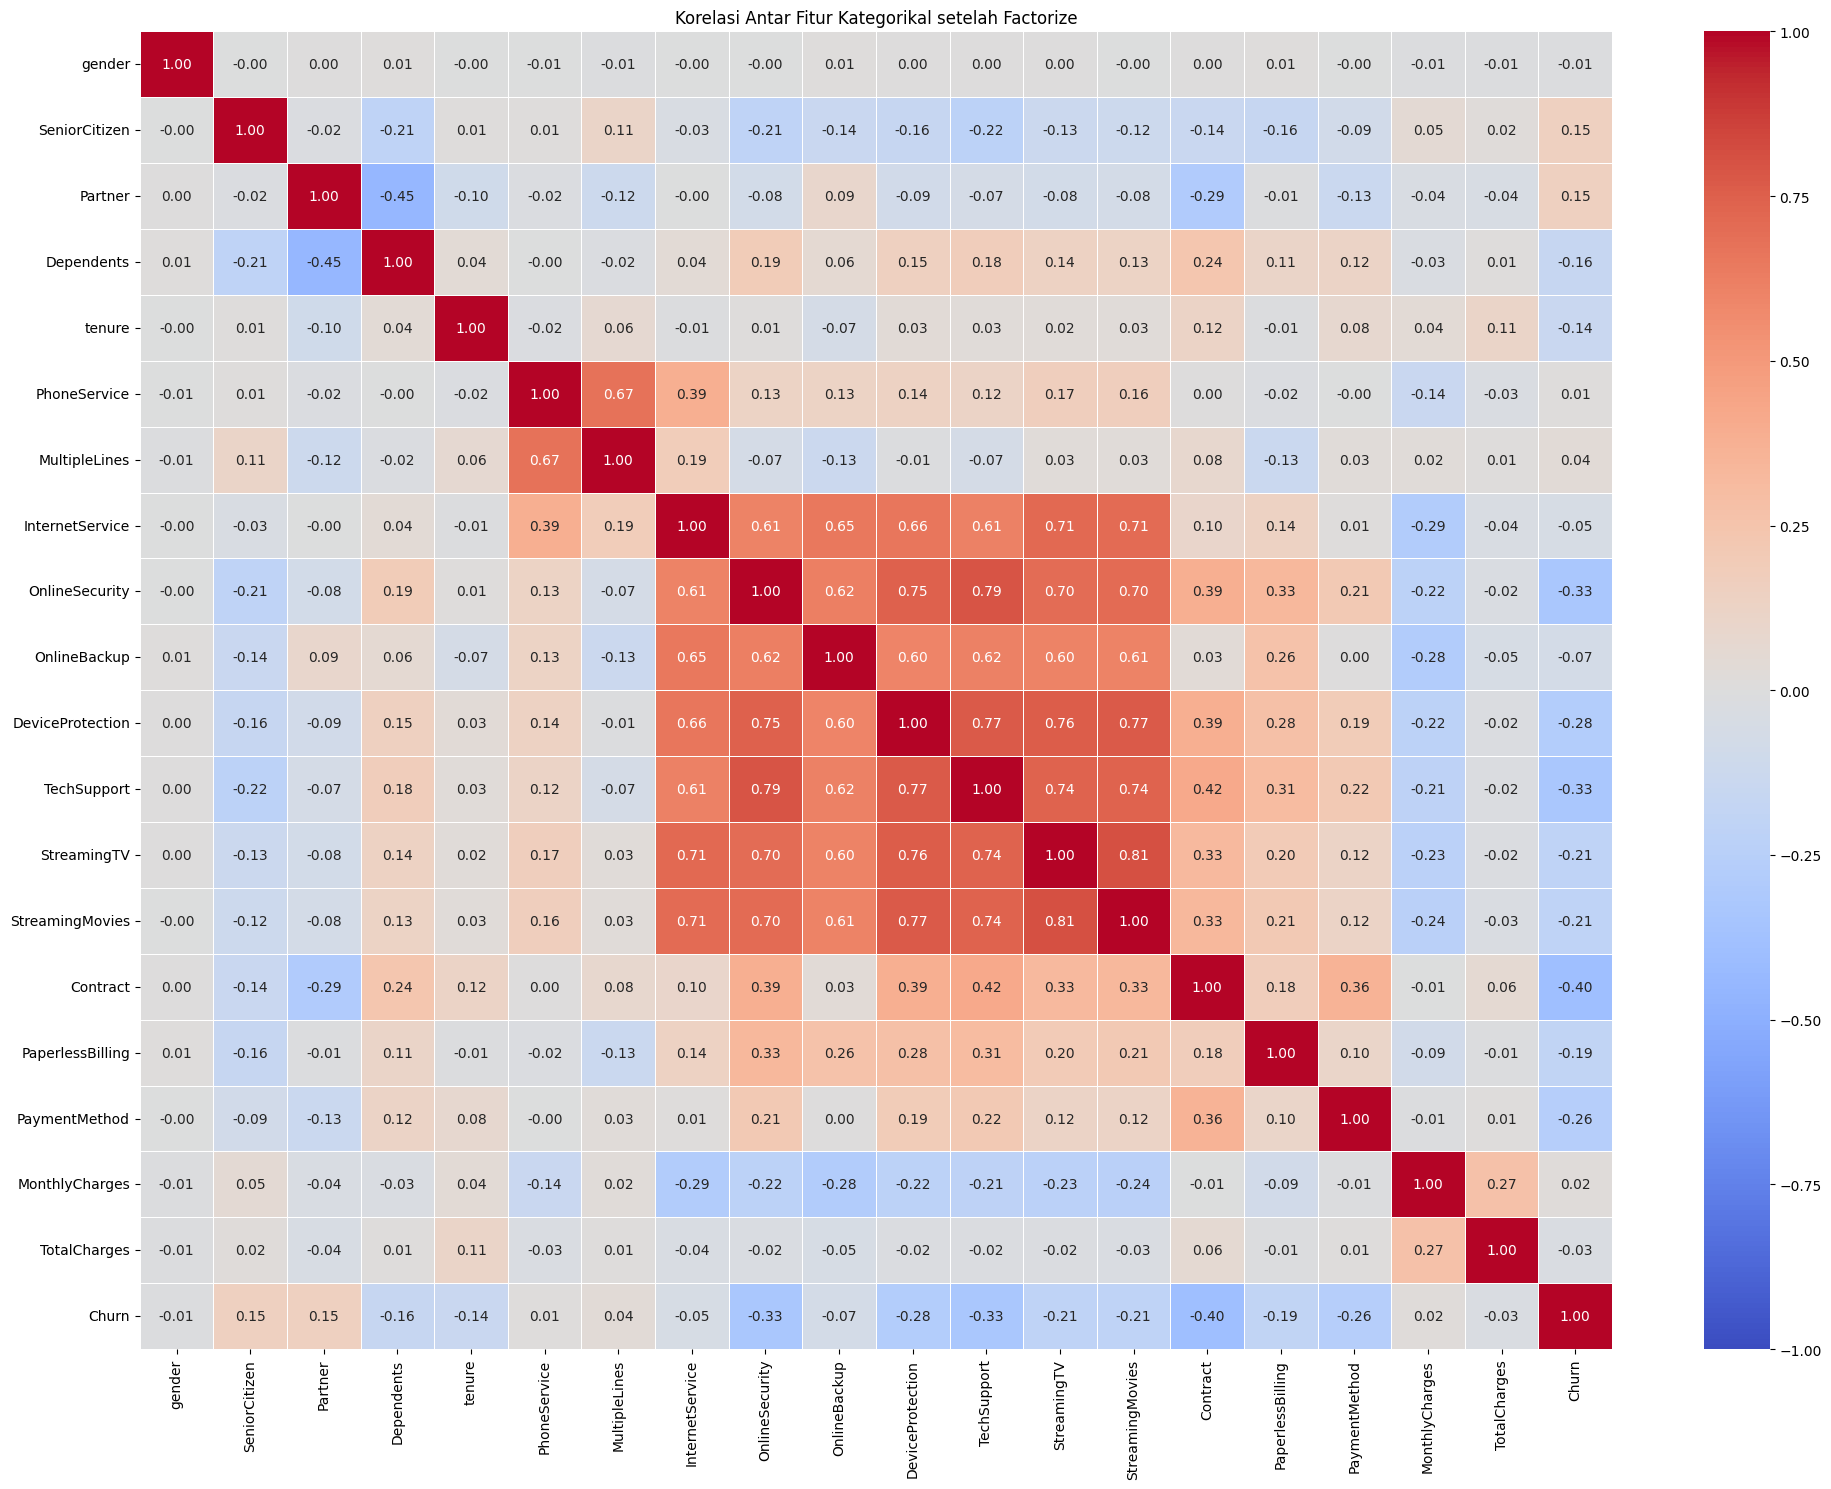

In [21]:
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

plt.figure(figsize=(20, 15))

ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5, vmin=-1, vmax=1,
                 xticklabels=corr.columns, yticklabels=corr.columns)

plt.title('Korelasi Antar Fitur Kategorikal setelah Factorize')
plt.tight_layout()

plt.show()

# 4. Data Preprocessing

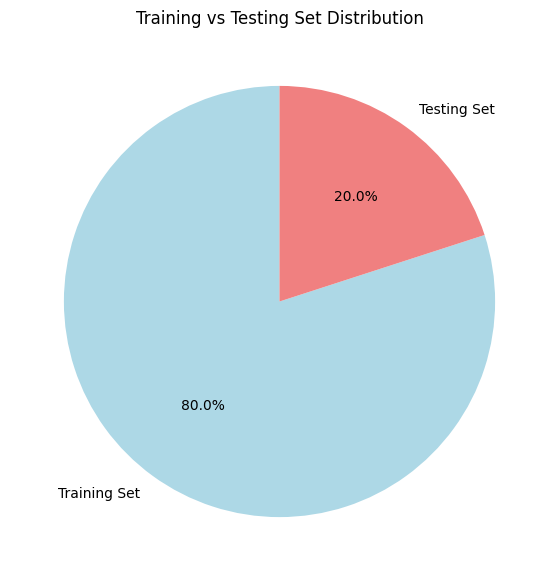

Training Data Shape: (5625, 30)
Testing Data Shape: (1407, 30)


In [22]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)
split_sizes = [len(X_train), len(X_test)]


labels = ['Training Set', 'Testing Set']
plt.figure(figsize=(7, 7))
plt.pie(split_sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Training vs Testing Set Distribution')
plt.show()

print(f"Training Data Shape: {X_train_preprocessed.shape}")
print(f"Testing Data Shape: {X_test_preprocessed.shape}")

# 7. Model Building & Training

In [23]:
y_train_numeric = y_train.map({'Yes': 1, 'No': 0})
y_test_numeric = y_test.map({'Yes': 1, 'No': 0})

In [24]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

In [25]:
evaluation_results = []
feature_importance_results = {}

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



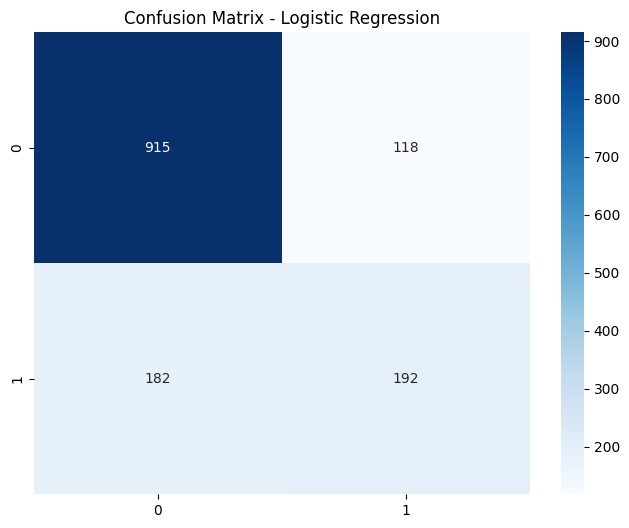

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



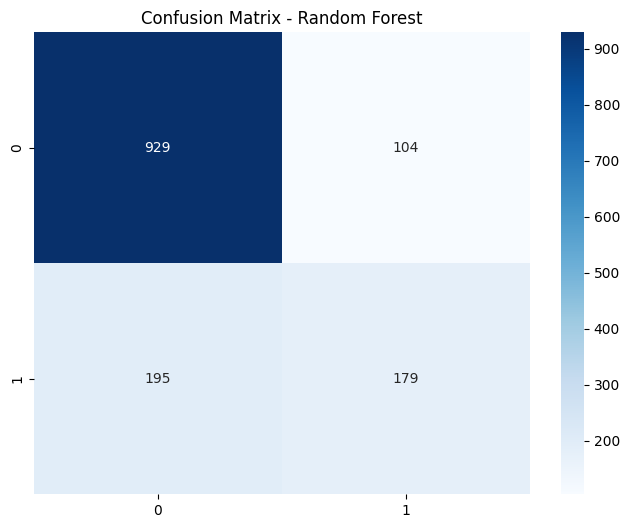

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



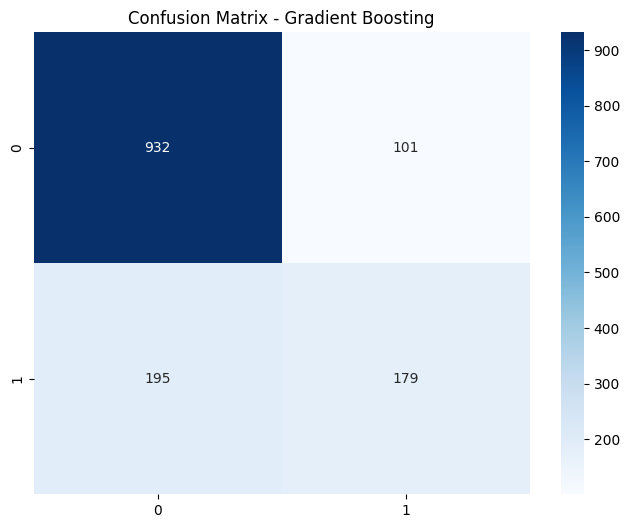

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.47      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407



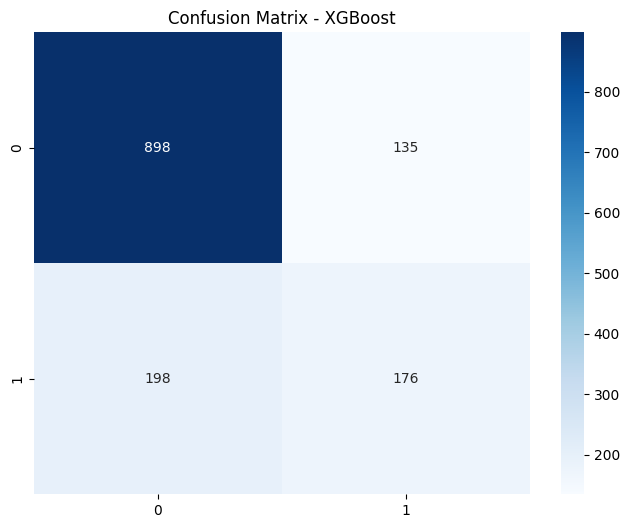

In [26]:
for name, model in models.items():
    model.fit(X_train_preprocessed, y_train_numeric)

    y_pred = model.predict(X_test_preprocessed)
    y_pred_prob = model.predict_proba(X_test_preprocessed)[:, 1]

    accuracy = accuracy_score(y_test_numeric, y_pred)
    precision = precision_score(y_test_numeric, y_pred)
    recall = recall_score(y_test_numeric, y_pred)
    f1 = f1_score(y_test_numeric, y_pred)
    auc = roc_auc_score(y_test_numeric, y_pred_prob)

    evaluation_results.append([name, accuracy, precision, recall, f1, auc])

    print(f"{name} - Classification Report:")
    print(classification_report(y_test_numeric, y_pred))

    cm = confusion_matrix(y_test_numeric, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    if hasattr(model, 'feature_importances_'):
        feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
        feature_importance_results[name] = pd.DataFrame({
            'Feature': feature_names,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

In [27]:
evaluation_df = pd.DataFrame(evaluation_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

print("\nModel Comparison Evaluation:")
print(evaluation_df)


Model Comparison Evaluation:
                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.786780   0.619355  0.513369  0.561404  0.832006
1        Random Forest  0.787491   0.632509  0.478610  0.544901  0.816546
2    Gradient Boosting  0.789623   0.639286  0.478610  0.547401  0.833887
3              XGBoost  0.763326   0.565916  0.470588  0.513869  0.809691



Feature Importance for Models:

Random Forest - Feature Importance:
                                       Feature  Importance
2                            num__TotalCharges    0.192555
0                                  num__tenure    0.172762
1                          num__MonthlyCharges    0.171334
10            cat__InternetService_Fiber optic    0.038679
28         cat__PaymentMethod_Electronic check    0.037415
3                             cat__gender_Male    0.028210
13                     cat__OnlineSecurity_Yes    0.027877
25                      cat__Contract_Two year    0.025702
26                   cat__PaperlessBilling_Yes    0.025082
19                        cat__TechSupport_Yes    0.023150
5                             cat__Partner_Yes    0.022634
24                      cat__Contract_One year    0.022354
4                       cat__SeniorCitizen_Yes    0.021777
15                       cat__OnlineBackup_Yes    0.020935
9                       cat__MultipleLines_Yes

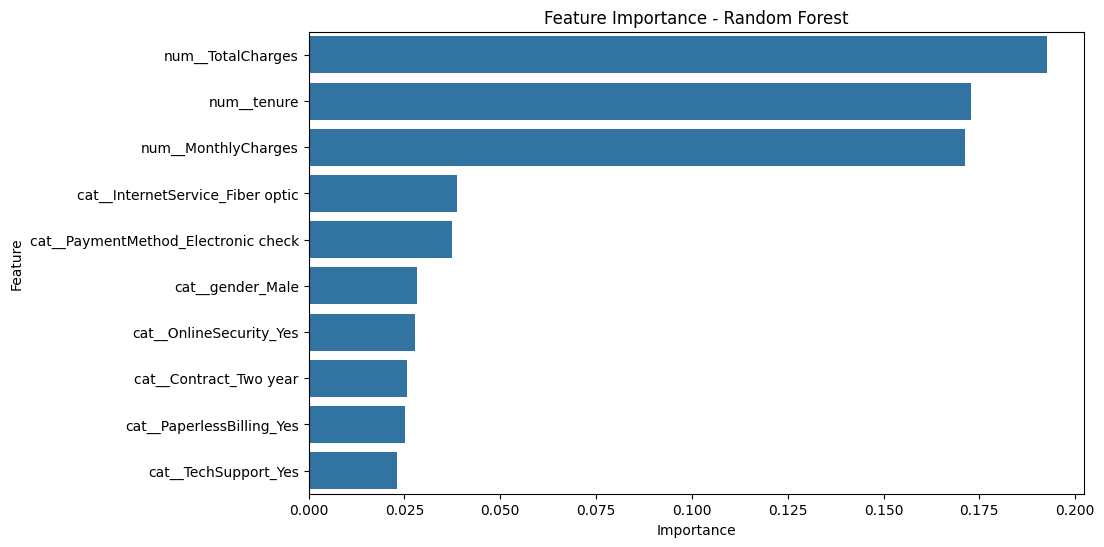


Gradient Boosting - Feature Importance:
                                       Feature  Importance
0                                  num__tenure    0.312890
10            cat__InternetService_Fiber optic    0.207994
28         cat__PaymentMethod_Electronic check    0.093715
2                            num__TotalCharges    0.077539
1                          num__MonthlyCharges    0.062675
25                      cat__Contract_Two year    0.058727
24                      cat__Contract_One year    0.057122
13                     cat__OnlineSecurity_Yes    0.019909
19                        cat__TechSupport_Yes    0.017439
26                   cat__PaperlessBilling_Yes    0.012941
4                       cat__SeniorCitizen_Yes    0.011621
23                    cat__StreamingMovies_Yes    0.009943
20        cat__StreamingTV_No internet service    0.009902
14       cat__OnlineBackup_No internet service    0.005970
21                        cat__StreamingTV_Yes    0.005938
9              

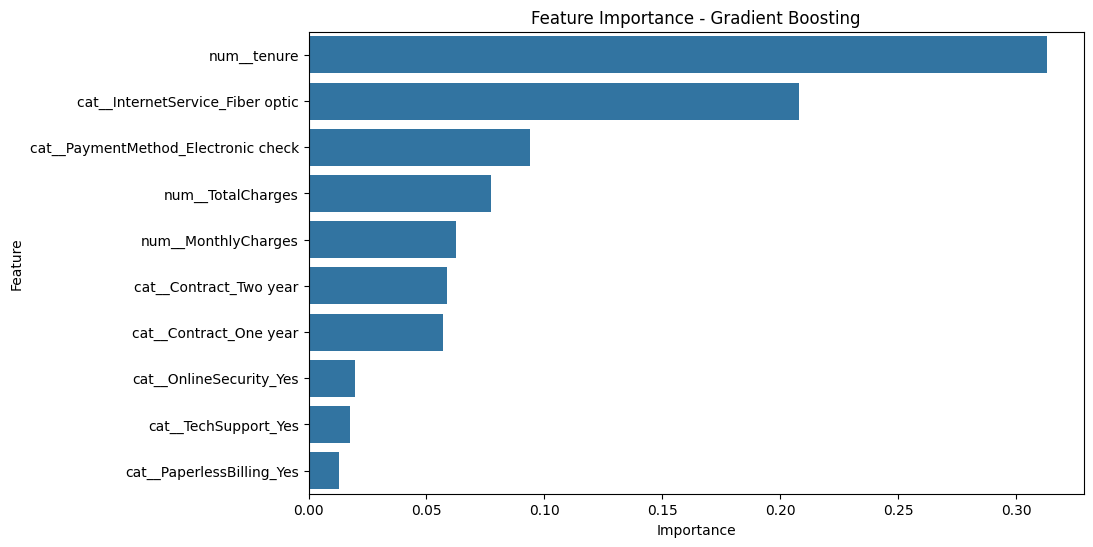


XGBoost - Feature Importance:
                                       Feature  Importance
10            cat__InternetService_Fiber optic    0.388359
25                      cat__Contract_Two year    0.164961
11                     cat__InternetService_No    0.116710
24                      cat__Contract_One year    0.078916
23                    cat__StreamingMovies_Yes    0.023434
0                                  num__tenure    0.023122
7                        cat__PhoneService_Yes    0.016260
21                        cat__StreamingTV_Yes    0.015417
9                       cat__MultipleLines_Yes    0.014993
13                     cat__OnlineSecurity_Yes    0.014745
28         cat__PaymentMethod_Electronic check    0.014236
19                        cat__TechSupport_Yes    0.013828
4                       cat__SeniorCitizen_Yes    0.012467
29             cat__PaymentMethod_Mailed check    0.012158
1                          num__MonthlyCharges    0.011481
26                   cat_

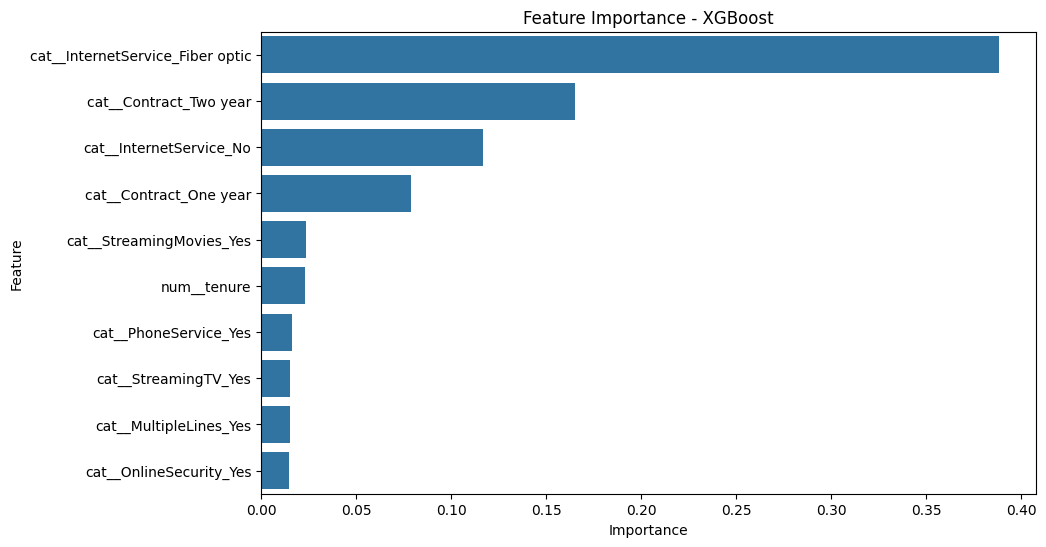

In [28]:
print("\nFeature Importance for Models:")
for model_name, feature_importance_df in feature_importance_results.items():
    print(f"\n{model_name} - Feature Importance:")
    print(feature_importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
    plt.title(f"Feature Importance - {model_name}")
    plt.show()

### **Kesimpulan Berdasarkan Hasil Model Comparison dan Feature Importance**

#### **Model Comparison**:

Berdasarkan hasil evaluasi model yang telah dilakukan, berikut adalah kesimpulan dari masing-masing model yang diuji:

| Model                   | Accuracy | Precision | Recall | F1-Score | AUC   |
| ----------------------- | -------- | --------- | ------ | -------- | ----- |
| **Logistic Regression** | 0.787    | 0.619     | 0.513  | 0.561    | 0.832 |
| **Random Forest**       | 0.787    | 0.633     | 0.479  | 0.545    | 0.817 |
| **Gradient Boosting**   | 0.790    | 0.639     | 0.479  | 0.547    | 0.834 |
| **XGBoost**             | 0.763    | 0.566     | 0.471  | 0.514    | 0.810 |

1. **Gradient Boosting** memiliki **accuracy** tertinggi di antara semua model (0.790), diikuti oleh **Random Forest** (0.787) dan **Logistic Regression** (0.787). **XGBoost** memiliki **accuracy** yang lebih rendah (0.763).

2. Dalam hal **precision**, **Gradient Boosting** unggul dengan nilai 0.639, diikuti oleh **Random Forest** (0.633) dan **Logistic Regression** (0.619). **XGBoost** memiliki precision terendah di antara model-model yang diuji (0.566).

3. Untuk **recall**, **Logistic Regression** menunjukkan nilai terbaik (0.513), sedangkan **Random Forest** dan **Gradient Boosting** memiliki nilai recall yang sama (0.479), dan **XGBoost** sedikit lebih rendah (0.471).

4. **F1-Score**: **Logistic Regression** memiliki **F1-Score** yang sedikit lebih tinggi (0.561) dibandingkan dengan **Random Forest** (0.545) dan **Gradient Boosting** (0.547). **XGBoost** memiliki F1-Score terendah (0.514).

5. **AUC (Area Under Curve)**: **Gradient Boosting** memiliki **AUC** tertinggi (0.834), menunjukkan bahwa model ini paling baik dalam memisahkan kelas churn dan non-churn. **Logistic Regression** juga menunjukkan **AUC** yang baik (0.832), diikuti oleh **Random Forest** (0.817). **XGBoost** memiliki **AUC** terendah (0.810).

#### **Feature Importance (Gradient Boosting)**:

Berikut adalah fitur-fitur yang paling penting dalam model **Gradient Boosting** berdasarkan **feature importance** yang dihitung:

1. **`num__tenure`** (0.313): Fitur **tenure** (lama pelanggan bertahan) adalah fitur yang paling penting dalam model, dengan nilai **importance** 0.313. Ini menunjukkan bahwa durasi pelanggan menggunakan layanan sangat berpengaruh terhadap kemungkinan **churn**.

2. **`cat__InternetService_Fiber optic`** (0.208): Pelanggan dengan layanan **InternetService** jenis **Fiber optic** memiliki pengaruh besar terhadap churn, dengan **importance** 0.208.

3. **`cat__PaymentMethod_Electronic check`** (0.094): Metode pembayaran menggunakan **Electronic check** juga cukup signifikan dalam memprediksi churn, dengan **importance** 0.094.

4. **`num__TotalCharges`** (0.078) dan **`num__MonthlyCharges`** (0.063): **TotalCharges** dan **MonthlyCharges** adalah fitur penting yang menunjukkan kontribusi biaya pelanggan terhadap churn. Meskipun mereka tidak lebih penting daripada tenure dan metode pembayaran, mereka tetap memiliki pengaruh signifikan.

5. **`cat__Contract_Two year`** (0.059) dan **`cat__Contract_One year`** (0.057): Jenis kontrak yang dimiliki pelanggan juga berpengaruh. Pelanggan yang terikat kontrak selama dua tahun atau satu tahun cenderung memiliki kemungkinan churn yang lebih rendah.

6. Fitur seperti **`cat__OnlineSecurity_Yes`**, **`cat__TechSupport_Yes`**, **`cat__StreamingTV_Yes`**, dan **`cat__StreamingMovies_Yes`** juga berkontribusi, meskipun dengan **importance** yang lebih rendah (sekitar 0.01 hingga 0.02).

#### **Kesimpulan Umum**:

* **Gradient Boosting** adalah model yang secara keseluruhan menunjukkan performa terbaik berdasarkan **AUC** dan **F1-Score**, meskipun memiliki sedikit penurunan dalam **recall**. Model ini sangat cocok untuk prediksi **churn** berdasarkan hasil yang kuat di **AUC**.
* **Logistic Regression** lebih sederhana namun memiliki performa yang cukup baik dalam **precision** dan **recall**, sehingga bisa digunakan jika interpretabilitas lebih penting.
* **Random Forest** memberikan performa yang mirip dengan **Gradient Boosting**, namun sedikit lebih rendah dalam hal **precision** dan **AUC**.
* **XGBoost** menunjukkan hasil yang lebih rendah dibandingkan model lainnya, meskipun masih dapat digunakan dalam beberapa kasus. Mungkin ada kebutuhan untuk tuning hyperparameters lebih lanjut.

**Feature Importance** menunjukkan bahwa **tenure**, jenis **InternetService**, dan **PaymentMethod** adalah faktor paling signifikan dalam memprediksi **churn** pelanggan. Sebagai langkah selanjutnya, Anda dapat melakukan **hyperparameter tuning** untuk mengoptimalkan model dan meningkatkan performa.
